# Intro
## General
Machine learning allows the user to feed a computer algorithm an immense amount of data and have the computer analyze and make data-driven recommendations and decisions based on only the input data. 
In most of the situations we want to have a machine learning system to make **predictions**, so we have several categories of machine learning tasks depending on the type of prediction needed: **Classification, Regression, Clustering, Generation**, etc.

**Classification** is the task whose goal is the prediction of the label of the class to which the input belongs (e.g., Classification of images in two classes: cats and dogs).
**Regression** is the task whose goal is the prediction of numerical value(s) related to the input (e.g., House rent prediction, Estimated time of arrival ).
**Generation** is the task whose goal is the creation of something new related to the input (e.g., Text translation, Audio beat generation, Image denoising ). **Clustering** is the task of grouping a set of objects in such a way that objects in the same group (called a **cluster**) are more similar (in some sense) to each other than to those in other **clusters** (e.g., Clients clutering).

In machine learning, there are learning paradigms that relate to one aspect of the dataset: **the presence of the label to be predicted**. **Supervised Learning** is the paradigm of learning that is applied when the dataset has the label variables to be predicted, known as ` y variables`. **Unsupervised Learning** is the paradigm of learning that is applied when the dataset has not the label variables to be predicted. **Self-supervised Learning** is the paradigm of learning that is applied when part of the X dataset is considere as the label to be predicted (e.g., the Dataset is made of texts and the model try to predict the next word of each sentence).

## Notebook overview

This notebook is a guide to start practicing Machine Learning.

# Setup

## Installation
Here is the section to install all the packages/libraries that will be needed to tackle the challlenge.

In [1]:
# !pip install  optuna

In [2]:
##Data Handling
import pandas as pd
import numpy as np

##Visualization Libraries 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns 
%matplotlib inline
import plotly.express as ex
import plotly.express as px
import plotly.express as px
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)  # Initialize Plotly for offline mode

# Feature Processing (Scikit-learn processing, etc. )
import phik

# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample

# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
import optuna
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,f1_score

# Other packages
import os
import warnings
from joblib import dump, load

# Suppress all warnings
warnings.filterwarnings("ignore")

# II. Data Loading
Data Loading
Here is the section to load the datasets (train, eval, test) and the additional files

#### 2.1 train dataset

In [3]:
path=r"C:\Users\DAVID\Career-Accelerator-LP6\Paitients_Files_Train.csv"
df_train= pd.read_csv(path)
df_train.rename(columns={'PRG':'Plasma glucose','PL': 'Blood Work Result-1','PR': 'Blood Pressure',
                         'SK': 'Blood Work Result-2','TS': 'Blood Work Result-3','M11': 'Body mass index',
                         'BD2': 'Blood Work Result-4',
                         'Sepssis': 'Sepsis'}, inplace=True)
df_train.head()

,ID,Plasma glucose,Blood Work Result-1,Blood Pressure,Blood Work Result-2,Blood Work Result-3,Body mass index,Blood Work Result-4,Age,Insurance,Sepsis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


#### 2.2. test dataset

In [4]:
path=r"C:\Users\DAVID\Career-Accelerator-LP6\Paitients_Files_Test.csv"
df_test= pd.read_csv(path)
df_test.rename(columns={'PRG':'Plasma glucose','PL': 'Blood Work Result-1','PR': 'Blood Pressure',
                         'SK': 'Blood Work Result-2','TS': 'Blood Work Result-3','M11': 'Body mass index',
                         'BD2': 'Blood Work Result-4'}, inplace=True)
df_test.head()

,ID,Plasma glucose,Blood Work Result-1,Blood Pressure,Blood Work Result-2,Blood Work Result-3,Body mass index,Blood Work Result-4,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


# III. Exploratory Data Analysis: EDA
Here is the section to **inspect** the datasets in depth, **present** it, make **hypotheses** and **think** the *cleaning, processing and features creation*.

### 3.1 Dataset Overview

#### 3.1.1 Data info

In [5]:
# checking for info on the datasets
data = {'df_train': df_train, 'df_test': df_test}
for name, dataset in data.items():
    print(f"the info {name} dataset are: \n\n",dataset.info(),"\n" + "---" * 15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   599 non-null    object 
 1   Plasma glucose       599 non-null    int64  
 2   Blood Work Result-1  599 non-null    int64  
 3   Blood Pressure       599 non-null    int64  
 4   Blood Work Result-2  599 non-null    int64  
 5   Blood Work Result-3  599 non-null    int64  
 6   Body mass index      599 non-null    float64
 7   Blood Work Result-4  599 non-null    float64
 8   Age                  599 non-null    int64  
 9   Insurance            599 non-null    int64  
 10  Sepsis               599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB
the info df_train dataset are: 

 None 
---------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 10 c

✍ summary:
- the train dataset has 11 features with 599 entries.
- the test dataset has 10 features with 169 entries.

#### 3.1.2 checking missing values

In [6]:
# checking for missing values in the datasets
data = {'df_train': df_train, 'df_test': df_test}
for name, dataset in data.items():
    print(f"the info {name} dataset are: \n\n",dataset.isna().sum(),"\n" + "---" * 15)

the info df_train dataset are: 

 ID                     0
Plasma glucose         0
Blood Work Result-1    0
Blood Pressure         0
Blood Work Result-2    0
Blood Work Result-3    0
Body mass index        0
Blood Work Result-4    0
Age                    0
Insurance              0
Sepsis                 0
dtype: int64 
---------------------------------------------
the info df_test dataset are: 

 ID                     0
Plasma glucose         0
Blood Work Result-1    0
Blood Pressure         0
Blood Work Result-2    0
Blood Work Result-3    0
Body mass index        0
Blood Work Result-4    0
Age                    0
Insurance              0
dtype: int64 
---------------------------------------------


- both datasets have no missing values

#### 3.1.3 checking Data shape

In [7]:
# checking for the shapes of the datasets
print(df_train.shape, df_test.shape)

(599, 11) (169, 10)


#### 3.1.4 Descriptive Statistics

In [8]:
# descriptive statistics
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Plasma glucose,599.0,3.824708,3.362839,0.000,1.000,3.000,6.000,17.00
Blood Work Result-1,599.0,120.153589,32.682364,0.000,99.000,116.000,140.000,198.00
Blood Pressure,599.0,68.732888,19.335675,0.000,64.000,70.000,80.000,122.00
Blood Work Result-2,599.0,20.562604,16.017622,0.000,0.000,23.000,32.000,99.00
Blood Work Result-3,599.0,79.460768,116.576176,0.000,0.000,36.000,123.500,846.00
Body mass index,599.0,31.920033,8.008227,0.000,27.100,32.000,36.550,67.10
Blood Work Result-4,599.0,0.481187,0.337552,0.078,0.248,0.383,0.647,2.42
Age,599.0,33.290484,11.828446,21.000,24.000,29.000,40.000,81.00
Insurance,599.0,0.686144,0.464447,0.000,0.000,1.000,1.000,1.00


In [9]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Plasma glucose,169.0,3.917160,3.402415,0.0,1.000,3.000,6.000,13.000
Blood Work Result-1,169.0,123.520710,29.259123,56.0,102.000,120.000,141.000,199.000
Blood Pressure,169.0,70.426036,19.426805,0.0,62.000,74.000,80.000,114.000
Blood Work Result-2,169.0,20.443787,15.764962,0.0,0.000,23.000,32.000,49.000
Blood Work Result-3,169.0,81.000000,110.720852,0.0,0.000,0.000,135.000,540.000
Body mass index,169.0,32.249704,7.444886,0.0,27.600,32.400,36.600,57.300
Blood Work Result-4,169.0,0.438876,0.306935,0.1,0.223,0.343,0.587,1.698
Age,169.0,33.065089,11.548110,21.0,24.000,28.000,42.000,70.000
Insurance,169.0,0.727811,0.446410,0.0,0.000,1.000,1.000,1.000


✍ summary:

- From the descriptive statistics of the datasets there are some features with minimum value of 0.thus in Plasma glucose, Blood Work Result-1, Blood Pressure,Blood Work Result-2, Blood Work Result-3, and Body mass index. 
From Domain Knowledge in biology ,these features should not have a value of 0. Therefore, it is reasonable to assume that any missing value was filled out with 0.


- All features  have very high standard deviations, which means they are spreaded over a very wide range except for Blood Work Result-4.
From the descriptive statistics of the train set, the mean and median of some columns are very different from each other, especially in the following features: Plasma glucose, Blood Work Result-2, Blood Work Result-3, Blood Work Result-4, Age. This indicates these columns have skewness in their distribution. Other columns also has some minor discrepancies between their means and medians, but not as extreme as those mentioned above.

#### 3.1.5 finding count and percentage of missing values in all the features

In [10]:
def count_missing_val(df, cols):
    print('\tMissing val Count\tMissing val Percentage')
    for col in cols:
        missing_cnt = df[col].value_counts()[0] # frequency of zero entries in a particular column
        missing_percentage = round((missing_cnt/len(df) * 100), 2)
        print(str(col) + ': \t\t' + str(missing_cnt) + '\t\t\t' + str(missing_percentage).zfill(5) + '\t%')

In [11]:
# finding the missing values in the respective columns in the train set
train_missing_col=['Plasma glucose', 'Blood Pressure', 'Blood Work Result-2', 'Blood Work Result-3', 'Body mass index']
count_missing_val(df_train, train_missing_col)

	Missing val Count	Missing val Percentage
Plasma glucose: 		93			15.53	%
Blood Pressure: 		28			04.67	%
Blood Work Result-2: 		175			29.22	%
Blood Work Result-3: 		289			48.25	%
Body mass index: 		9			001.5	%


In [12]:
# finding the missing values in the respective columns in the test set
test_missing_col=['Plasma glucose', 'Blood Pressure', 'Blood Work Result-2', 'Blood Work Result-3', 'Body mass index']
count_missing_val(df_test,test_missing_col)

	Missing val Count	Missing val Percentage
Plasma glucose: 		18			10.65	%
Blood Pressure: 		7			04.14	%
Blood Work Result-2: 		52			30.77	%
Blood Work Result-3: 		85			050.3	%
Body mass index: 		2			01.18	%


#### 3.1.6 checking for duplicates

In [13]:
#Check for duplicates
duplicate_rows_train = df_train.duplicated().sum()
duplicate_rows_test = df_test.duplicated().sum()
print('There are ',duplicate_rows_train,' duplicated rows for the training set')
print('There are ',duplicate_rows_test,' duplicated rows for the test set')

There are  0  duplicated rows for the training set
There are  0  duplicated rows for the test set


### 3.2 Descriptive Statistics & Central Tendencies

#### 3.2.1 checking for skewness

In [14]:
# checking for skewness
df_train.skew(numeric_only=True).sort_values(ascending=False)

Blood Work Result-3    2.401585
Blood Work Result-4    1.989472
Age                    1.152353
Plasma glucose         0.914008
Blood Work Result-2    0.164063
Blood Work Result-1    0.116180
Body mass index       -0.405255
Insurance             -0.804257
Blood Pressure        -1.874662
dtype: float64

from the above it can be observed that:
- Positively-skewed: Blood Work Result-3, Blood Work Result-4, Age, Plasma glucose, Blood Work Result-1, Blood Work Result-2
- Negatively-skewed: Blood Pressure, Insurance, Body mass index 

#### 3.2.2 visualization of skewness for the train set
- Histograms of these features will be plotted to visualize their distributions

In [15]:
# making a copy
train= df_train.copy()

In [16]:
def dist_plot(df, avoid, name_for_title):
    df_copy = df.copy(deep=True) # Copy the original dataframe
    df_copy.drop(labels=avoid, axis='columns',inplace=True) # Drop avoid columns
    
    # Set up subplots in 3x3 grid
    fig, axes = plt.subplots(3, 3, constrained_layout=True, figsize=(10, 8))
    plt.suptitle('Distribution of Features in ' + name_for_title + ' Set', fontsize=20)
    
    r = 0 # current row
    c = 0 # current column
    
    for col in df_copy.columns:
        # Plot histogram of each column
        sns.histplot(data=df, x=col, kde=True, ax=axes[r, c])
        axes[r, c].title.set_text('Histogram of ' + str(col))
         # Update position for next subplot
        if (c == 2):
            c = 0
            r += 1
        else: 
            c += 1
            
    fig.delaxes(axes[2, 2]) # Delete unused subplot
        

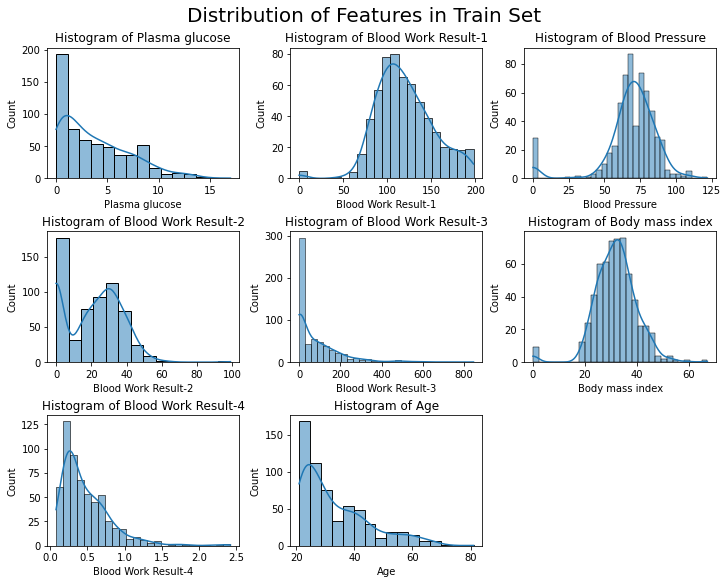

In [17]:
dist_plot(df=train, avoid=['ID', 'Insurance', 'Sepsis'], name_for_title='Train')

✍ summary:
- Right-skewed: Plasma glucose, Blood Work Result-2, Blood Work Result-3 , Blood Work Result-4, Age.
- Normally-distributed: Blood Work Result-1 , Blood Pressure, Body mass index.
- The skewness will be dealt with in the later section by normalizing the data

In [18]:
# similarly, checking for skewness for  the test dataset
df_test.skew(numeric_only=True).sort_values(ascending=False)

Blood Work Result-3    1.747436
Blood Work Result-4    1.559577
Age                    1.049232
Plasma glucose         0.866427
Blood Work Result-1    0.531711
Blood Work Result-2   -0.096263
Body mass index       -0.520007
Insurance             -1.032858
Blood Pressure        -1.768116
dtype: float64

✍ summary:
- Similar to the train set, the columns in the test set have very large standard deviation as well.
- Positively-skewed: Blood Work Result-3, Blood Work Result-4, Age, Plasma glucose, Blood Work Result-1
- Negatively-skewed: Blood Pressure, Insurance, Body mass index, Blood Work Result-2 

#### 3.2.3 visualization of skewness for the test set
- The histograms of these features will be plotted to visualize their distributions:

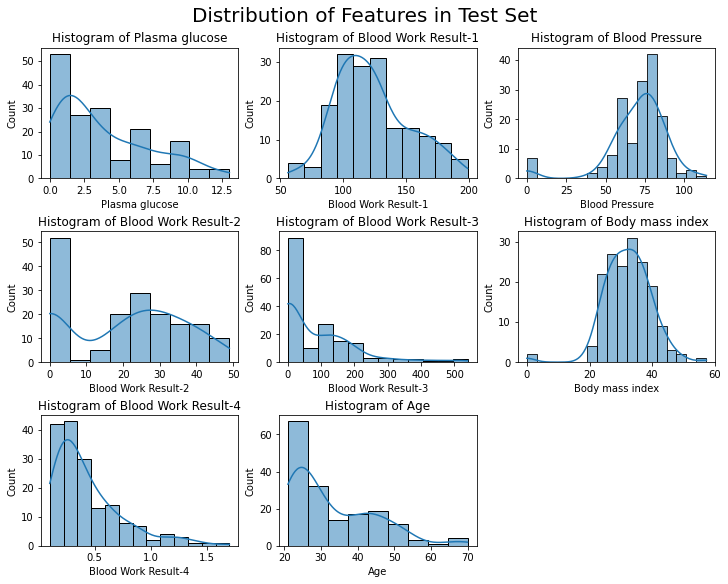

In [19]:
# making a copy
test=df_test.copy()
dist_plot(df=test, avoid=['ID', 'Insurance'], name_for_title='Test')

the distribution of the features are:
- Right-skewed: Plasma glucose, Blood Work Result-2, Blood Work Result-3, Blood Work Result-4, Age.
- Normally-distributed: Blood Work Result-1, Blood Pressure, Body mass index.

#### 3.2.4 checking for outliers of each numerical column

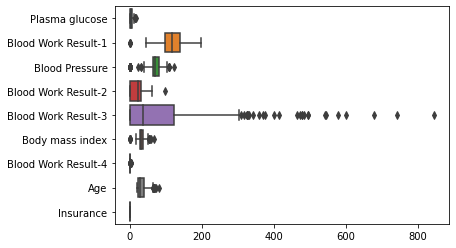

In [20]:
# Boxplot to see the outlier of each numerical column
sns.boxplot(data=train, orient="h");

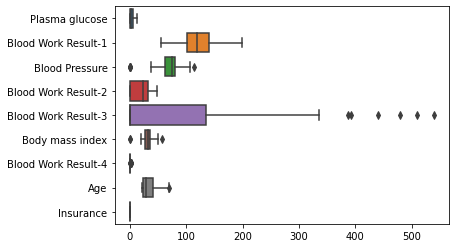

In [21]:
# Boxplot to see the outlier of each numerical column
sns.boxplot(data=test, orient="h");

- the output indicates strongly that there are outliers in all the datasets

# IV. Data Cleaning and Pre-processing

#### 4.1 Handling of outliers

In [22]:
# function to check for outliers in the dataframe
def handle_outliers(data_frame, column_name, method='clip', threshold=1.5):
    """
    Handle outliers in a specified column of a DataFrame using the IQR method.

    Parameters:
        data_frame (pd.DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column to handle outliers for.
        method (str, optional): The method to handle outliers. Options are 'clip' (default) or 'remove'.
        threshold (float, optional): The threshold to determine outliers in terms of IQR. Default is 1.5.

    Returns:
        pd.Series: The updated column with outliers handled.
    """
    column = data_frame[column_name]
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr

    if method == 'clip':
        updated_column = column.clip(lower_bound, upper_bound)
    elif method == 'remove':
        updated_column = column[(column >= lower_bound) & (column <= upper_bound)]
    else:
        raise ValueError("Invalid method. Choose 'clip' or 'remove'.")

    return updated_column


#### 4.2.1 Handling of outliers in the datasets

In [23]:
# handling outliers in the train dataset
train['Plasma glucose'] = handle_outliers(train, 'Plasma glucose', method='clip')
train['Blood Work Result-1']= handle_outliers(train, 'Blood Work Result-1', method='clip')
train['Blood Pressure']= handle_outliers(train, 'Blood Pressure', method='clip')
train['Blood Work Result-2']= handle_outliers(train, 'Blood Work Result-2', method='clip')
train['Blood Work Result-3']= handle_outliers(train, 'Blood Work Result-3', method='clip')
train['Body mass index']= handle_outliers(train, 'Body mass index', method='clip')
train['Age']= handle_outliers(train, 'Age', method='clip')
train['Insurance']= handle_outliers(train, 'Insurance', method='clip')


In [24]:
# handling outliers in the test dataset
test['Plasma glucose'] = handle_outliers(test, 'Plasma glucose', method='clip')
test['Blood Work Result-1']= handle_outliers(test, 'Blood Work Result-1', method='clip')
test['Blood Pressure']= handle_outliers(test, 'Blood Pressure', method='clip')
test['Blood Work Result-2']= handle_outliers(test, 'Blood Work Result-2', method='clip')
test['Blood Work Result-3']= handle_outliers(test, 'Blood Work Result-3', method='clip')
test['Body mass index']= handle_outliers(test, 'Body mass index', method='clip')
test['Age']= handle_outliers(test, 'Age', method='clip')
test['Insurance']= handle_outliers(test, 'Insurance', method='clip')

#### 4.2.2  visualization of outliers in the dataset

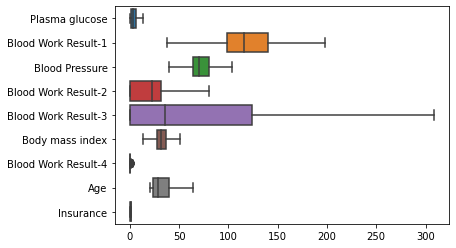

In [25]:
# checking for  outlier of each numerical column age
sns.boxplot(data=train, orient="h");

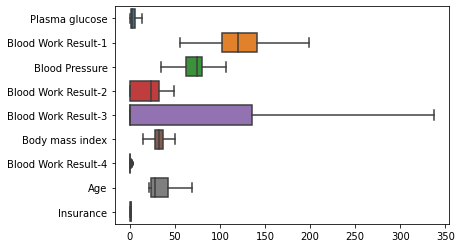

In [26]:
# checking for  outlier of each numerical column age
sns.boxplot(data=test, orient="h");

✍ summary:
there are no outliers now 

# V. Univariate Analysis
Here is the section to explore, analyze, visualize each variable independently of the others.

#### 5.1 visualization of the percentage unique values of our target

In [27]:
# visualizing the percentage unique values of the target  features.
import plotly.express as px
fig_1 = px.pie(train, names='Sepsis', title='Plot of Ratio of the Label Variables (Sepsis)')
iplot(fig_1)

✍ summary:
- from the visual, Label feature, We can observe that there is an imbalance in our dataset; therefore we will have to deal with that later.
- 65.3% of the patients are negative.
- 34.7% of the patients are positive.

#### 5.2 visualization of the features against  our target 
- At this stage we are going to compare all other features to the target or label. Since all features are continuous, box plot is used because it can clearly show the distribution, mean, and median of the features.

In [28]:
# function to compare the features against the target
def compare_plot(df, col):
    plt.figure(figsize=(5, 5))
    plt.title('Comparison of ' + str(col) + ' between sepsis-positive and sepsis-negative patients', 
              fontsize=20)
    
    # Property for the mean marker
    meanline = {'marker':'o', 'markersize':'10'}
    
    # Box plot of each column separated by Positive and Negative with sepsis
    # Show mean on box plot
    sns.boxplot(data=df, x='Sepsis', y=col, showmeans=True, meanprops=meanline)
    
    plt.xlabel('Sepsis', size=18)
    plt.ylabel(col, size=18)

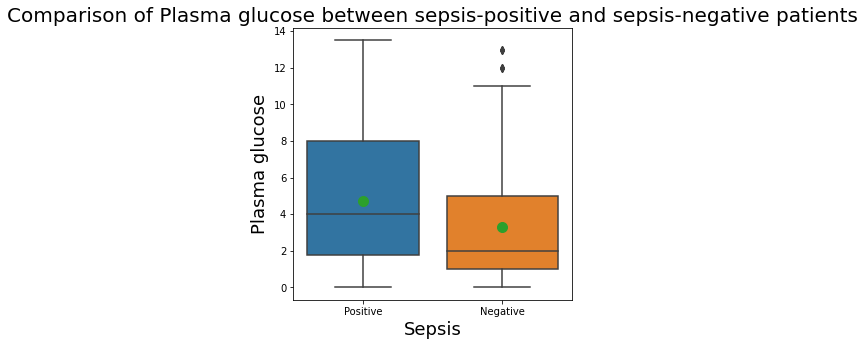

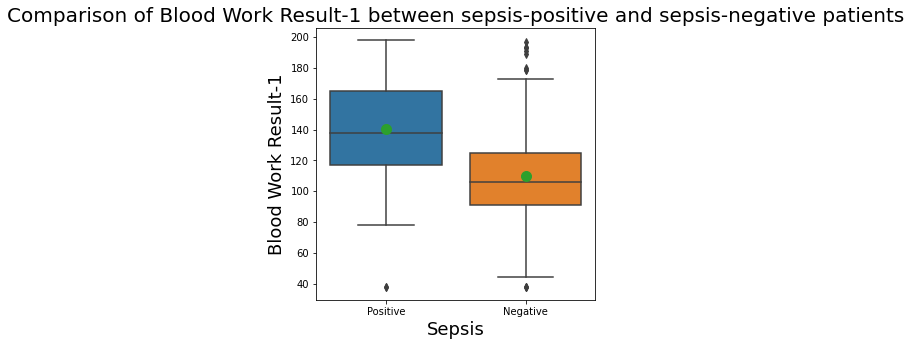

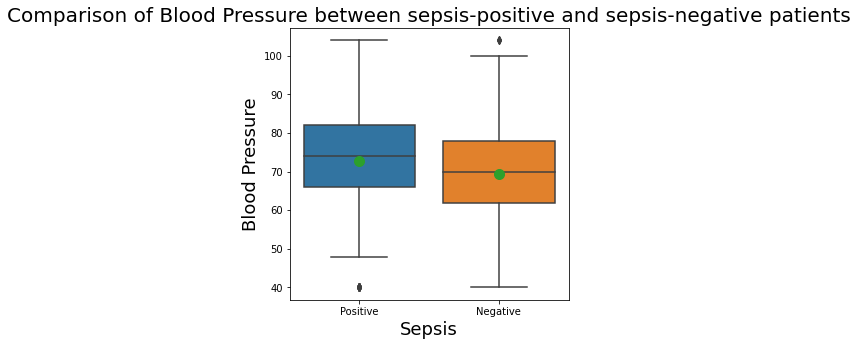

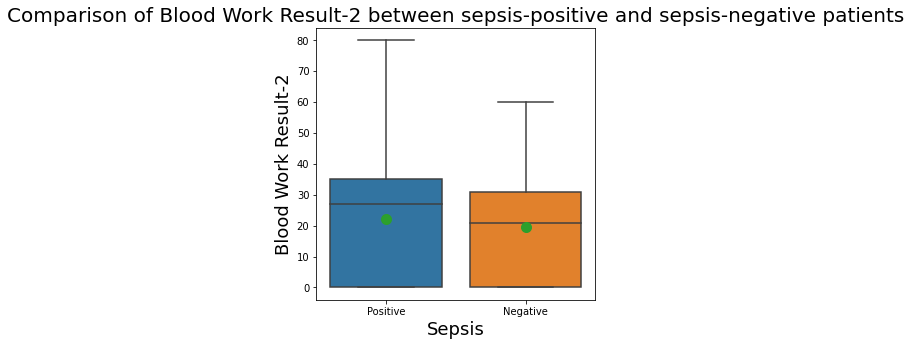

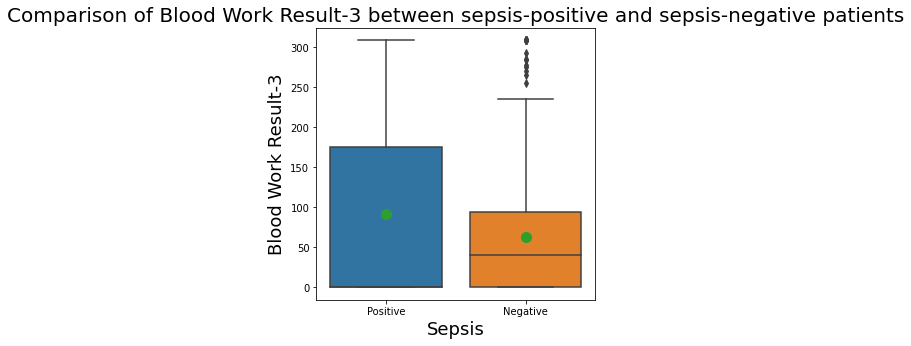

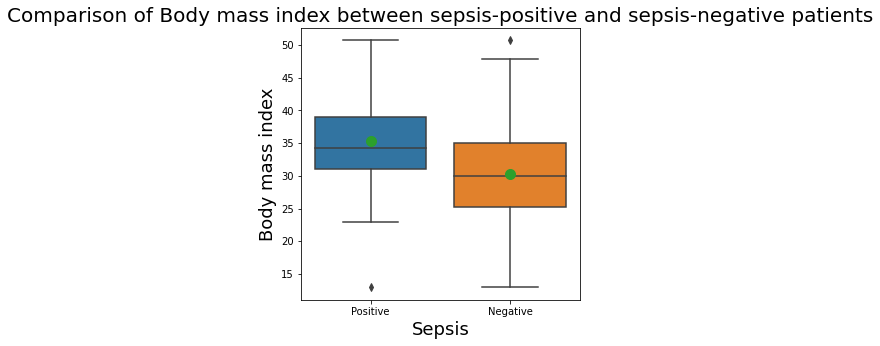

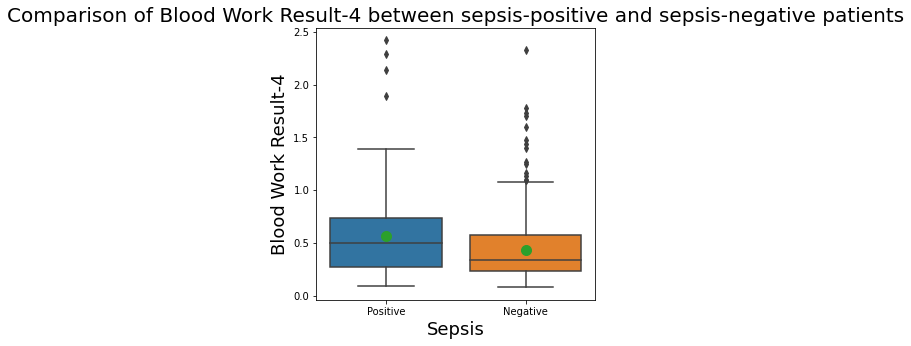

In [29]:
# calling  the compare plot function in the train set
cols = ['Plasma glucose', 'Blood Work Result-1', 'Blood Pressure', 'Blood Work Result-2', 
        'Blood Work Result-3', 'Body mass index', 'Blood Work Result-4']
for col in cols:
    compare_plot(train, col)

✍ summary:
- It can be easily observed that patients who are positive with sepsis have higher readings in all of their health features comparing to the negative group. Hence, it can be reasonably inferred that patients with higher level of plasma glucose, Body mass index , and for blood work results are more likely to develop sepsis.

#### 5.2.1 visualization of  count of  age feature 
Here we would like know the frequency of the age in our dataset.

In [30]:
# determining age count
Age_counts = train.groupby('Age').size().reset_index(name='count')

In [31]:
# visualization of age count
fig_2 = ex.scatter(Age_counts, x='Age', y='count', size='count', color= 'Age', hover_name='Age',log_y=False, size_max=60)
fig_2.show()

✍ summary:
- from the visual the age with the highest frequency are ages 21 and 22 whiles age 61 has the lowest frequency

#### 5.2.2 visualization of age group against the target 
- Here, we are going to create age group to aids in our analysis.

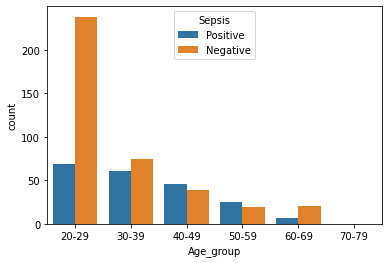

In [32]:
# Create the bin edges for the age groups
bins = list(range(20, 81, 10))

# Create the bin labels for the age groups (7 labels for 8 bins)
basket = ['{0}-{1}'.format(i, i + 9) for i in range(20, 81, 10)[:-1]]

# Use pd.cut() to assign age groups to each 'Age' value
train['Age_group'] = pd.cut(train['Age'], bins=bins, labels=basket, right=False)

# Plot the count of each age group colored by 'Sepsis'
sns.countplot(data=train, x='Age_group', hue='Sepsis');

✍ summary:
- from the visual, comparatively from 21-29 age group are less susceptive to sepsis than from 30-59 while patients at 60-69 are more susceptible sepsis, which i believe is because to weak immune system.

#### 5.2.3 visualization of count of other features against sepsis
- Here, we want varify how other features varies in terms of count with respect to the target feature

In [33]:
def create_histograms(data_frame, column_name):
    fig_3 = px.histogram(
        data_frame=data_frame,
        x=column_name,
        color="Sepsis",
        facet_col="Sepsis",
        nbins=50,
        title=f"{column_name} with Respect to Sepsis"
    )
    fig_3.show()

# Assuming your DataFrame is named 'train'
excluded_columns = ["Sepsis", "ID"]  # List of columns to exclude

for column in train.columns:
    if column not in excluded_columns:
        create_histograms(train, column)

✍ summary:
- Plasma glucose with Sepsis: from the visual it is evident that positive sepsis tends to fall gradually as count of plasma glucose increases.Similarly, for the negative sepsis, tends to also gradually diminish as the count of the plasma glucose increases. thus higher plasma glucose, the higher Plasma exchange, the higher the potential to improve survival in sepsis by removing inflammatory cytokines and restoring deficient plasma proteins.henc e patients with high plasma glucose are less prone to sepsis infection.

- blood work result-1 and Sepsis: in addition, we can infer that the count of the concentration in positive feature of sepsis is relatively low compared to the count of the concentration in the negative feature in sepsis. thus as the count of concentration of the blood work reault-1 increases the less prone the patient is to sepsis.

- Blood Pressure with Sepsis: similarly, the count of blood pressure in the positive sepsis cases are relatively low compared to the blood presure in the negative sepsis cases.secondly, the density of the negative sepsis cases with respect to blood presure is higher than that of the positive sepsis cases.

- Blood work result-2 with sepsis:furthermore,in this category, patients who are prone to sepsis are relatively low as compared to the counts of patients who are less prone to sepsis.

- Blood work Result-3 with sepsis: again,it can be observe that the number of patients less prone to sepsis are more than the number of patients prone to sepsis interm of blood work Result-3.

- Body mass index: comparatively, the count of patients without sepsis are also more the the count of patients with sepsis.

- blood work result-4: from the visual again, the count of patients without sepsis are mor than the patients with sepsis in the blook work result-4 feature.

- Age with sepsis: generally, from the visual, negative sepsis patients are more the positive sepsis patients. we also observed that, most patients with no sepsis fall between the age range of 20-40 years. the trend begins to fall drastically along the age range and even beyond.

- Insurance with sepsis: comparatively, most of the negative sepsis patient are insured to the positive patients.

# VI. Bivariate Analysis
Here is the section to explore, analyze, visualize each variable in relation to the others

In [34]:
# calling the columns
train.columns

Index(['ID', 'Plasma glucose', 'Blood Work Result-1', 'Blood Pressure',
       'Blood Work Result-2', 'Blood Work Result-3', 'Body mass index',
       'Blood Work Result-4', 'Age', 'Insurance', 'Sepsis', 'Age_group'],
      dtype='object')

- Relationship Between Blood Pressure and Body mass index with Respect To Sepsis

#### 6.1 visualization of the Body mass index and Blood Pressure with resprect to the  target

In [35]:
fig_4=px.scatter(train, x="Body mass index", y= "Blood Pressure",color= "Sepsis", 
                 title= "Relationship Between Blood Pressure and Body mass index with Respect To Sepsis")

iplot(fig_4)

✍ summary: 
- there is no significant corelation between Blood Presure and Body mass index. the it can observed that majority of patients are negative interms of sepsis. 

#### 6.2 Relationship Between Plasma glucose and Body mass index with Respect To Sepsis

In [36]:
fig_5=px.scatter(train, x="Plasma glucose", y= "Body mass index",color= "Sepsis", 
                 title= "Relationship Between Plasma glucose and Body mass index with Respect To Sepsis")

iplot(fig_5)

✍ summary:
- there is no corelation Body mass index and Plasma glucose. Also negative sepsis patients dominants these features.

# VII. Multivariate Analysis
Here is the section to explore, analyze, visualize each variable in relation to the others

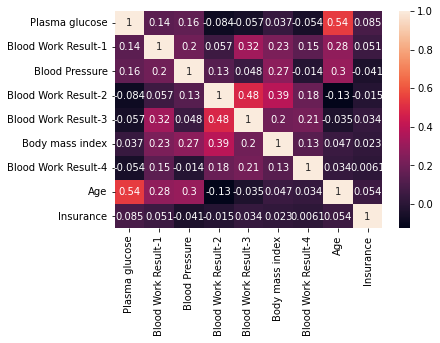

In [37]:
# heatmap of the train set features
sns.heatmap(train.corr(), annot= True);

✍ Observation
- the correlation between features are weak, except for the plasma glucose and age which is 0.54. this also is weak. Hence all features will be kept.

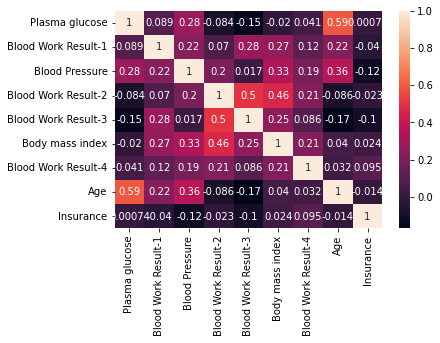

In [38]:
# heatmap of the test set features
sns.heatmap(test.corr(), annot= True);

✍ Observation
- similarly, the correlation between features are weak, except for the plasma glucose and age with a correlation coefficient of 0.54. this also is weak. Hence all features will be kept.

# VIII. Feature Processing & Engineering
Here is the section to clean, process the dataset and create new features

#### 8.1 Feature Selection
- in this section we will be selecting the best features to feed our models with. We will be using the Phi-Correlation

In [39]:
#the correlation of other features with churn
sepsis_corr= train.phik_matrix().loc["Sepsis"]
#sorting the values 
sepsis_cor=sepsis_corr.sort_values()
sepsis_corr

interval columns not set, guessing: ['Plasma glucose', 'Blood Work Result-1', 'Blood Pressure', 'Blood Work Result-2', 'Blood Work Result-3', 'Body mass index', 'Blood Work Result-4', 'Age', 'Insurance']


ID                     1.000000
Plasma glucose         0.282180
Blood Work Result-1    0.611669
Blood Pressure         0.205354
Blood Work Result-2    0.229503
Blood Work Result-3    0.404616
Body mass index        0.429088
Blood Work Result-4    0.231272
Age                    0.404641
Insurance              0.066436
Sepsis                 1.000000
Age_group              0.393934
Name: Sepsis, dtype: float64

#### 8.3 Ploting the phi-k correlation matrix

Text(0.5, 1.0, 'Phik Correlation Matrix for all  Features')

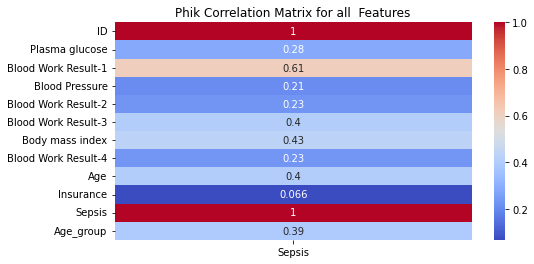

In [40]:
#ploting the phi-k correlation matrix
plt.figure(figsize= (8,4));
sns.heatmap(sepsis_corr.to_frame(), annot= True, cmap= "coolwarm")
plt.title("Phik Correlation Matrix for all  Features")

- from the phik correlation matrix, we will be dropping age_group since age and age_group are almost the same and we also drop insurance and ID.

In [41]:
# Drop some columns
train.drop(columns=['ID', 'Insurance','Age_group'], axis=1, inplace=True)
test.drop(columns=['ID','Insurance'], axis=1, inplace=True)

In [42]:
# unique values of the target
train['Sepsis'].unique()

array(['Positive', 'Negative'], dtype=object)

#### 8.4 Encoding the target

In [43]:
# Replace Positive with 1 and Negative with 0 in target column
train['Sepsis'].replace(to_replace='Positive', value='1', inplace=True)
train['Sepsis'].replace(to_replace='Negative', value='0', inplace=True)
# changing sepsis object type to integer
train['Sepsis'] = train['Sepsis'].astype('int')

In [44]:
train.head()

,Plasma glucose,Blood Work Result-1,Blood Pressure,Blood Work Result-2,Blood Work Result-3,Body mass index,Blood Work Result-4,Age,Sepsis
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1


In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Plasma glucose       599 non-null    float64
 1   Blood Work Result-1  599 non-null    float64
 2   Blood Pressure       599 non-null    float64
 3   Blood Work Result-2  599 non-null    float64
 4   Blood Work Result-3  599 non-null    float64
 5   Body mass index      599 non-null    float64
 6   Blood Work Result-4  599 non-null    float64
 7   Age                  599 non-null    float64
 8   Sepsis               599 non-null    int32  
dtypes: float64(8), int32(1)
memory usage: 39.9 KB


In [46]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Plasma glucose       169 non-null    int64  
 1   Blood Work Result-1  169 non-null    int64  
 2   Blood Pressure       169 non-null    float64
 3   Blood Work Result-2  169 non-null    int64  
 4   Blood Work Result-3  169 non-null    float64
 5   Body mass index      169 non-null    float64
 6   Blood Work Result-4  169 non-null    float64
 7   Age                  169 non-null    float64
dtypes: float64(5), int64(3)
memory usage: 10.7 KB


In [47]:
train.Sepsis.value_counts()

0    391
1    208
Name: Sepsis, dtype: int64

#### 8.5 Handling imbalance target class

In [48]:
# Separate majority and minority classes
train_majority = train[train.Sepsis==0]
train_minority = train[train.Sepsis==1]
 
# Upsample minority class
train_minority_upsampled = resample(train_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=391,    # to match majority class
                                 random_state=123) # reproducible results
 
train_upsampled = pd.concat([train_majority, train_minority_upsampled])

In [49]:
# Display new class counts
train_upsampled['Sepsis'].value_counts()

0    391
1    391
Name: Sepsis, dtype: int64

In [50]:
train_upsampled.columns

Index(['Plasma glucose', 'Blood Work Result-1', 'Blood Pressure',
       'Blood Work Result-2', 'Blood Work Result-3', 'Body mass index',
       'Blood Work Result-4', 'Age', 'Sepsis'],
      dtype='object')

In [51]:
# saving the dataset
train_upsampled.to_csv('final_set.csv')

In [52]:
train_upsampled.head()

,Plasma glucose,Blood Work Result-1,Blood Pressure,Blood Work Result-2,Blood Work Result-3,Body mass index,Blood Work Result-4,Age,Sepsis
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
5,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30.0,0
7,10.0,115.0,40.0,0.0,0.0,35.3,0.134,29.0,0
10,4.0,110.0,92.0,0.0,0.0,37.6,0.191,30.0,0


#### 8.6 Dataset Splitting

In [53]:
# dropping the target feature
X = train_upsampled.drop('Sepsis', axis=1)
# naming the target feature
y = train_upsampled.Sepsis

In [54]:
# splitting the data 
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .2, random_state=42, stratify= y)

In [55]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((625, 8), (157, 8), (625,), (157,))

In [56]:
# checking for missing values
X_train.isna().sum()

Plasma glucose         0
Blood Work Result-1    0
Blood Pressure         0
Blood Work Result-2    0
Blood Work Result-3    0
Body mass index        0
Blood Work Result-4    0
Age                    0
dtype: int64

In [57]:
## checking for missing values
X_train.isna().sum()

Plasma glucose         0
Blood Work Result-1    0
Blood Pressure         0
Blood Work Result-2    0
Blood Work Result-3    0
Body mass index        0
Blood Work Result-4    0
Age                    0
dtype: int64

In [58]:
# checking for datatypes
def check_dtypes(data_frame):
    dtypes_dict = data_frame.dtypes.to_dict()
    return dtypes_dict

In [59]:
check_dtypes(X_train)

{'Plasma glucose': dtype('float64'),
 'Blood Work Result-1': dtype('float64'),
 'Blood Pressure': dtype('float64'),
 'Blood Work Result-2': dtype('float64'),
 'Blood Work Result-3': dtype('float64'),
 'Body mass index': dtype('float64'),
 'Blood Work Result-4': dtype('float64'),
 'Age': dtype('float64')}

✍ Observation
- there are no categorical features in the X_train

In [60]:
# numerical features
num_attr=X_train.columns

# VIIII. Features Scaling

#### 9.1 Creating Pipelines

In [61]:
#creating pipelines
num_pipeline= Pipeline([('imputer', SimpleImputer()),('scaler', StandardScaler())])

In [62]:
# full pipeline using column transformer
full_pipeline=ColumnTransformer([('num_pipe',num_pipeline,num_attr)])

# X. Machine Learning Modeling
Here is the section to build, train, evaluate and compare the models to each others

In [63]:
models_trained= [] # empty list

#### 10.1 DecisionTree Classifier

In [64]:
# instantiating the model
DTC=DecisionTreeClassifier() 

DTC = Pipeline([
    ("col_trans", full_pipeline),
    ("feature_selection", SelectKBest(score_func=f_classif, k='all')),
    ("model", DecisionTreeClassifier(random_state=42, max_depth=6, min_samples_leaf=8))
])

#### 10.1.1 model fitting

In [65]:
# Fitting the model
DTC.fit(X_train,y_train)

Pipeline(steps=[('col_trans',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Plasma glucose', 'Blood Work Result-1', 'Blood Pressure',
       'Blood Work Result-2', 'Blood Work Result-3', 'Body mass index',
       'Blood Work Result-4', 'Age'],
      dtype='object'))])),
                ('feature_selection', SelectKBest(k='all')),
                ('model',
                 DecisionTreeClassifier(max_depth=6, min_samples_leaf=8,
                                        random_state=42))])

#### 10.1.2 model prediction

In [66]:
# making prediction
model_1= DTC.predict(X_test)

#### 10.1.3 classification report

In [67]:
# print  classification report
print(classification_report(model_1,y_test))

              precision    recall  f1-score   support

           0       0.76      0.71      0.74        84
           1       0.69      0.74      0.72        73

    accuracy                           0.73       157
   macro avg       0.73      0.73      0.73       157
weighted avg       0.73      0.73      0.73       157



##### 10.1.4 confusion matrix display

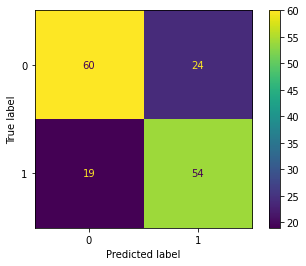

In [68]:
# viewing confusion matrix display
ConfusionMatrixDisplay.from_predictions(model_1,y_test);

#### 10.1.5 Appending model

In [69]:
# appending the model into the empty list
models_trained.append(DTC)

#### 10.2 Logistic Regressor Pipeline

In [70]:
# instantiating the model
LRP=LogisticRegression()


LRP = Pipeline([
    ("col_trans", full_pipeline),
    ("feature_selection", SelectKBest(score_func=f_classif, k='all')),
    ("model",LogisticRegression(random_state=42))
])


##### 10.2.1 model fitting

In [71]:
# fitting the model
LRP.fit(X_train,y_train)

Pipeline(steps=[('col_trans',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Plasma glucose', 'Blood Work Result-1', 'Blood Pressure',
       'Blood Work Result-2', 'Blood Work Result-3', 'Body mass index',
       'Blood Work Result-4', 'Age'],
      dtype='object'))])),
                ('feature_selection', SelectKBest(k='all')),
                ('model', LogisticRegression(random_state=42))])

#### 10.2.2 model prediction

In [72]:
# making prediction
model_2= LRP.predict(X_test)

#### 10.2.3 classification report

In [73]:
# printing classification report
print(classification_report(model_2, y_test))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73        79
           1       0.73      0.73      0.73        78

    accuracy                           0.73       157
   macro avg       0.73      0.73      0.73       157
weighted avg       0.73      0.73      0.73       157



#### 10.2.4 Confusion Matrix

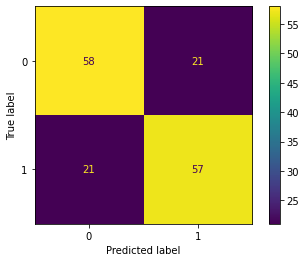

In [74]:
ConfusionMatrixDisplay.from_predictions(model_2, y_test);

#### 10.2.5 Appending model

In [75]:
models_trained.append(LRP)

#### 10.3 Random forest pipeline

In [76]:
#instantiating
RFC=RandomForestClassifier()

RFC= Pipeline([
    ("col_trans", full_pipeline),
    ("feature_selection", SelectKBest(score_func=f_classif, k='all')),
    ("model",RandomForestClassifier(random_state=42, max_depth=6, min_samples_leaf=8))
])

#### 10.3.1 fitting model

In [77]:
RFC.fit(X_train,y_train)

Pipeline(steps=[('col_trans',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Plasma glucose', 'Blood Work Result-1', 'Blood Pressure',
       'Blood Work Result-2', 'Blood Work Result-3', 'Body mass index',
       'Blood Work Result-4', 'Age'],
      dtype='object'))])),
                ('feature_selection', SelectKBest(k='all')),
                ('model',
                 RandomForestClassifier(max_depth=6, min_samples_leaf=8,
                                        random_state=42))])

#### 10.3.2 making prediction

In [78]:
model_3= RFC.predict(X_test)

#### 10.3.3 classification report

In [79]:
print(classification_report(model_3,y_test))

              precision    recall  f1-score   support

           0       0.75      0.81      0.78        73
           1       0.82      0.76      0.79        84

    accuracy                           0.78       157
   macro avg       0.78      0.79      0.78       157
weighted avg       0.79      0.78      0.78       157



#### 10.3.4 confusion matrix

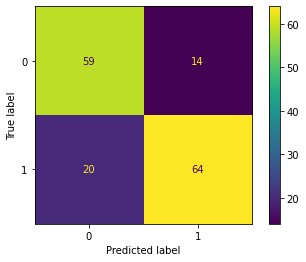

In [80]:
ConfusionMatrixDisplay.from_predictions(model_3,y_test);

#### 10.3.5 Appending model

In [81]:
models_trained.append(RFC)

#### 10.4 SVM Pipeline

In [82]:
# instantiating
SVM=SVC()

SVM= Pipeline([
    ("col_trans", full_pipeline),
    ("feature_selection", SelectKBest(score_func=f_classif, k='all')),
    ("model",SVC(gamma='auto'))
])

#### 10.4.1 fitting the model

In [83]:
SVM.fit(X_train, y_train)

Pipeline(steps=[('col_trans',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Plasma glucose', 'Blood Work Result-1', 'Blood Pressure',
       'Blood Work Result-2', 'Blood Work Result-3', 'Body mass index',
       'Blood Work Result-4', 'Age'],
      dtype='object'))])),
                ('feature_selection', SelectKBest(k='all')),
                ('model', SVC(gamma='auto'))])

#### 10.4.2 making prediction

In [84]:
model_4= SVM.predict(X_test)

#### 10.4.3 making prediction

In [85]:
print(classification_report(model_4, y_test))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75        81
           1       0.73      0.75      0.74        76

    accuracy                           0.75       157
   macro avg       0.75      0.75      0.75       157
weighted avg       0.75      0.75      0.75       157



#### 10.4.4 confusion matrix 

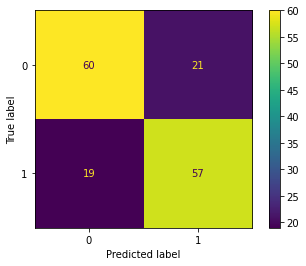

In [86]:
ConfusionMatrixDisplay.from_predictions(model_4, y_test);

In [87]:
#### 10.4.5 Appending model

In [88]:
models_trained.append(SVM)

#### 10.5 XGBoost Pipeline

In [89]:
# instantiating the model
XGB=XGBClassifier()

XGB= Pipeline([
    ("col_trans", full_pipeline),
    ("feature_selection", SelectKBest(score_func=f_classif, k='all')),
    ("model",XGBClassifier(random_state=42))
])

#### 10.5.1 fitting the model

In [90]:
XGB.fit(X_train, y_train)

Pipeline(steps=[('col_trans',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Plasma glucose', 'Blood Work Result-1', 'Blood Pressure',
       'Blood Work Result-2', 'Blood Work Result-3', 'Body mass index',
       'Blood Work Result-4', 'Age'],
      dtype='object'))])),
                ('feature_selection', SelectKBest(k='all')...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=42, ...))])

#### 10.5.2 making prediction

In [91]:
model_5=XGB.predict(X_test)

#### 10.5.3 classification report

In [92]:
print(classification_report(model_5, y_test))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85        72
           1       0.90      0.82      0.86        85

    accuracy                           0.85       157
   macro avg       0.85      0.86      0.85       157
weighted avg       0.86      0.85      0.85       157



#### 10.5.4 confusion matrix

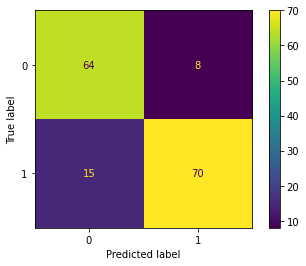

In [93]:
ConfusionMatrixDisplay.from_predictions(model_5, y_test);

#### 10.5.5 Appending moodel

In [94]:
models_trained.append(XGB)

#### 10.6 AdaBoostClassifier 

In [95]:
Ada=AdaBoostClassifier()

Ada = Pipeline([
    ("col_trans", full_pipeline),
    ("feature_selection", SelectKBest(score_func=f_classif, k='all')),
    ("model",AdaBoostClassifier(random_state=42))
])

#### 10.6.1 fitting model

In [96]:
Ada.fit(X_train,y_train)

Pipeline(steps=[('col_trans',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Plasma glucose', 'Blood Work Result-1', 'Blood Pressure',
       'Blood Work Result-2', 'Blood Work Result-3', 'Body mass index',
       'Blood Work Result-4', 'Age'],
      dtype='object'))])),
                ('feature_selection', SelectKBest(k='all')),
                ('model', AdaBoostClassifier(random_state=42))])

#### 10.6.2 model prediction

In [97]:
model_6 = Ada.predict(X_test)

#### 10.6.3 classification report

In [98]:
print(classification_report(model_6, y_test))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81        77
           1       0.82      0.80      0.81        80

    accuracy                           0.81       157
   macro avg       0.81      0.81      0.81       157
weighted avg       0.81      0.81      0.81       157



#### 10.6.4 confusion matrix

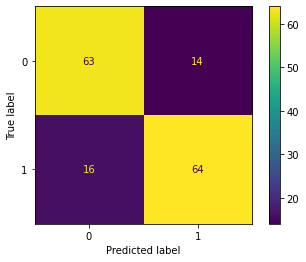

In [99]:
ConfusionMatrixDisplay.from_predictions(model_6, y_test);

#### 10.6.5 Appending model

In [100]:
models_trained.append(Ada)

#### 10.7 Naive Bayes pipeline

In [101]:
# instantiating the model
NBP=GaussianNB()

NBP= Pipeline([
    ("col_trans", full_pipeline),
    ("feature_selection", SelectKBest(score_func=f_classif, k='all')),
    ("model",GaussianNB())
])

#### 10.7.1 fitting the model

In [102]:
NBP.fit(X_train, y_train)

Pipeline(steps=[('col_trans',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Plasma glucose', 'Blood Work Result-1', 'Blood Pressure',
       'Blood Work Result-2', 'Blood Work Result-3', 'Body mass index',
       'Blood Work Result-4', 'Age'],
      dtype='object'))])),
                ('feature_selection', SelectKBest(k='all')),
                ('model', GaussianNB())])

#### 10.7.2 making prediction

In [103]:
model_7= NBP.predict(X_test)

#### 10.7.3 classification report

In [104]:
print(classification_report(model_7, y_test))

              precision    recall  f1-score   support

           0       0.72      0.68      0.70        84
           1       0.65      0.70      0.68        73

    accuracy                           0.69       157
   macro avg       0.69      0.69      0.69       157
weighted avg       0.69      0.69      0.69       157



#### 10.7.4 confusion matrix

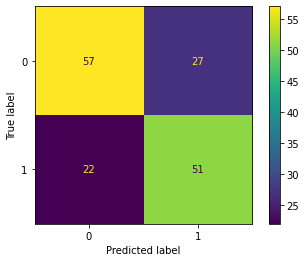

In [105]:
ConfusionMatrixDisplay.from_predictions(model_7,y_test);

# XI. Models Comparison
Create a pandas dataframe that will allow you to compare your models.

Find a sample frame below :

In [107]:
# creating a list
pipelines = [DTC, SVM, LRP, NBP, Ada, XGB, RFC]
res = []  # creating an empty list

for pipe in pipelines:
    pipe.fit(X_train, y_train)
    model_name = pipe.named_steps['model'].__class__.__name__# calling model name
    accuracy_score_value = accuracy_score(y_test, pipe.predict(X_test))# setting the accuracy score
    result = {'model': model_name, 'metric(accuracy_score)': accuracy_score_value}  
    res.append(result)
results = pd.DataFrame(res)
results = results.sort_values(by='metric(accuracy_score)', ascending=False)
results

,model,metric(accuracy_score)
5,XGBClassifier,0.853503
4,AdaBoostClassifier,0.808917
6,RandomForestClassifier,0.783439
1,SVC,0.745223
2,LogisticRegression,0.732484
0,DecisionTreeClassifier,0.726115
3,GaussianNB,0.687898


# XII.Hyperparameter tuning
Fine-tune the Top-k models (3 < k < 5) using a GridSearchCV (that is in sklearn.model_selection ) and Optuna to find the best hyperparameters and achieve the maximum performance of each of the Top-k models, then compare them again to select the best one.

#### 12.1 using GridSearchCV

In [108]:
# Define your best model pipeline
XGB = Pipeline([
    ("col_trans", full_pipeline),
    ("feature_selection", SelectKBest(score_func=f_classif, k='all')),
    ("model",XGBClassifier(random_state=42))
])

# Define the hyperparameters grid for XGBoost
param_grid_xgb = {
    "model__base_estimator__learning_rate": [0.1, 0.01],
    "model__base_estimator__max_depth": [5,10,20],
    "model__base_estimator__n_estimators": [50,100, 200]
}

# Perform grid search cross-validation to find the best hyperparameters
grid_search_xgb = GridSearchCV(estimator=XGB, param_grid=param_grid_xgb, scoring='accuracy', cv=5)
grid_search_xgb.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding model
best_params_xgb = grid_search_xgb.best_params_
best_model_xgb = grid_search_xgb.best_estimator_

# Predict on the test set using the best XGBoost model
y_pred = best_model_xgb.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Parameters: {best_params_xgb}")
print(f"Accuracy: {accuracy}")


[00:19:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "base_estimator__learning_rate", "base_estimator__max_depth", "base_estimator__n_estimators" } are not used.

[00:19:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "base_estimator__learning_rate", "base_estimator__max_depth", "base_estimator__n_estimators" } are not used.

[00:19:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "base_estimator__learning_rate", "base_estimator__max_depth", "base_estimator__n_estimators" } are not used.

[00:19:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Para

[00:20:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "base_estimator__learning_rate", "base_estimator__max_depth", "base_estimator__n_estimators" } are not used.

[00:20:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "base_estimator__learning_rate", "base_estimator__max_depth", "base_estimator__n_estimators" } are not used.

[00:20:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "base_estimator__learning_rate", "base_estimator__max_depth", "base_estimator__n_estimators" } are not used.

[00:20:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Para

[00:20:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "base_estimator__learning_rate", "base_estimator__max_depth", "base_estimator__n_estimators" } are not used.

[00:20:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "base_estimator__learning_rate", "base_estimator__max_depth", "base_estimator__n_estimators" } are not used.

[00:20:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "base_estimator__learning_rate", "base_estimator__max_depth", "base_estimator__n_estimators" } are not used.

[00:20:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Para

[00:20:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "base_estimator__learning_rate", "base_estimator__max_depth", "base_estimator__n_estimators" } are not used.

Best Parameters: {'model__base_estimator__learning_rate': 0.1, 'model__base_estimator__max_depth': 5, 'model__base_estimator__n_estimators': 50}
Accuracy: 0.8535031847133758


#### 12.2 using optuna

In [109]:
XGB = XGBClassifier()

# Define the objective function for Optuna
def objective(trial):
    learning_rate = trial.suggest_float('learning_rate', 0.001, 0.1)
    max_depth = trial.suggest_int('max_depth', 3, 10)
    n_estimators = trial.suggest_int('n_estimators', 50, 300)

    model = Pipeline([
        ("col_trans", full_pipeline),
        ("feature_selection", SelectKBest(score_func=f_classif, k='all')),
        ("model",XGBClassifier(learning_rate=learning_rate, max_depth=max_depth, n_estimators=n_estimators, random_state=42))
    ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Create a study object and optimize
study = optuna.create_study(direction='maximize')  # 'maximize' for accuracy
study.optimize(objective, n_trials=100)  # You can adjust the number of trials

# Print the optimization results
print('Number of finished trials: ', len(study.trials))
print('Best trial:')
trial = study.best_trial

print('Value: ', trial.value)
print('Params: ')
for key, value in trial.params.items():
    print(f'    {key}: {value}')

[I 2023-08-18 00:20:23,349] A new study created in memory with name: no-name-a033fb3b-9c9c-4c14-8501-5f21556f9760
[I 2023-08-18 00:20:24,312] Trial 0 finished with value: 0.8662420382165605 and parameters: {'learning_rate': 0.06206985681512176, 'max_depth': 8, 'n_estimators': 233}. Best is trial 0 with value: 0.8662420382165605.
[I 2023-08-18 00:20:25,285] Trial 1 finished with value: 0.8343949044585988 and parameters: {'learning_rate': 0.09054770862167484, 'max_depth': 6, 'n_estimators': 270}. Best is trial 0 with value: 0.8662420382165605.
[I 2023-08-18 00:20:25,801] Trial 2 finished with value: 0.8789808917197452 and parameters: {'learning_rate': 0.057761757055756834, 'max_depth': 6, 'n_estimators': 137}. Best is trial 2 with value: 0.8789808917197452.
[I 2023-08-18 00:20:26,477] Trial 3 finished with value: 0.8343949044585988 and parameters: {'learning_rate': 0.050114001932132266, 'max_depth': 4, 'n_estimators': 278}. Best is trial 2 with value: 0.8789808917197452.
[I 2023-08-18 00

[I 2023-08-18 00:20:53,016] Trial 38 finished with value: 0.8662420382165605 and parameters: {'learning_rate': 0.045836395025932626, 'max_depth': 6, 'n_estimators': 122}. Best is trial 2 with value: 0.8789808917197452.
[I 2023-08-18 00:20:53,604] Trial 39 finished with value: 0.8853503184713376 and parameters: {'learning_rate': 0.09893992308634537, 'max_depth': 5, 'n_estimators': 147}. Best is trial 39 with value: 0.8853503184713376.
[I 2023-08-18 00:20:54,242] Trial 40 finished with value: 0.8662420382165605 and parameters: {'learning_rate': 0.09964184526373078, 'max_depth': 5, 'n_estimators': 149}. Best is trial 39 with value: 0.8853503184713376.
[I 2023-08-18 00:20:54,918] Trial 41 finished with value: 0.8789808917197452 and parameters: {'learning_rate': 0.0844165166995529, 'max_depth': 6, 'n_estimators': 139}. Best is trial 39 with value: 0.8853503184713376.
[I 2023-08-18 00:20:55,529] Trial 42 finished with value: 0.8535031847133758 and parameters: {'learning_rate': 0.088473954265

[I 2023-08-18 00:21:25,013] Trial 76 finished with value: 0.8535031847133758 and parameters: {'learning_rate': 0.04062828777458406, 'max_depth': 8, 'n_estimators': 229}. Best is trial 39 with value: 0.8853503184713376.
[I 2023-08-18 00:21:25,879] Trial 77 finished with value: 0.8726114649681529 and parameters: {'learning_rate': 0.047921293796124455, 'max_depth': 6, 'n_estimators': 198}. Best is trial 39 with value: 0.8853503184713376.
[I 2023-08-18 00:21:26,731] Trial 78 finished with value: 0.8471337579617835 and parameters: {'learning_rate': 0.05188002534754971, 'max_depth': 7, 'n_estimators': 142}. Best is trial 39 with value: 0.8853503184713376.
[I 2023-08-18 00:21:27,761] Trial 79 finished with value: 0.8598726114649682 and parameters: {'learning_rate': 0.045195242573821265, 'max_depth': 5, 'n_estimators': 290}. Best is trial 39 with value: 0.8853503184713376.
[I 2023-08-18 00:21:28,807] Trial 80 finished with value: 0.8471337579617835 and parameters: {'learning_rate': 0.041649567

Number of finished trials:  100
Best trial:
Value:  0.8853503184713376
Params: 
    learning_rate: 0.09893992308634537
    max_depth: 5
    n_estimators: 147


#### 12.2.1 results

In [110]:
# Extract the result
def get_params(input_study) :
    params = {k: v for k, v in input_study.best_params.items() if k not in ('dim_red', 'scalers')}
    change = []
    for k,v in dict(params).items():
        tmp_name = k
        if 'XGBClassifier' not in tmp_name :
            res = f"XGBClassifier__{tmp_name}"
            params[res] = params.pop(tmp_name)
            change.append(res)
    return params

params = get_params(study)
params

{'XGBClassifier__learning_rate': 0.09893992308634537,
 'XGBClassifier__max_depth': 5,
 'XGBClassifier__n_estimators': 147}

#### 12.2.2 paramters

In [111]:
XGB_hy = Pipeline([
    ("col_trans", full_pipeline),
    ("feature_selection", SelectKBest(score_func=f_classif, k='all')),
    ("model",XGBClassifier(
        learning_rate=0.06494272544557561,
        max_depth=6,
        n_estimators=139,
        random_state=42
    ))
])

#### 12.2.3 fitting best model

In [112]:
XGB_hy.fit(X_train, y_train)

Pipeline(steps=[('col_trans',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Plasma glucose', 'Blood Work Result-1', 'Blood Pressure',
       'Blood Work Result-2', 'Blood Work Result-3', 'Body mass index',
       'Blood Work Result-4', 'Age'],
      dtype='object'))])),
                ('feature_selection', SelectKBest(k='all')...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.06494272544557561, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=6,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               n_estimators=139, n_jobs=None,
                               num_parallel_tree=None, predictor=None,
                               random_state=42, ...))])

#### 12.2.4 making prediction

In [113]:
final_model= XGB_hy.predict(X_test)

#### 12.2.4 classification report for best model

In [114]:
print(classification_report(final_model, y_test))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87        70
           1       0.94      0.84      0.88        87

    accuracy                           0.88       157
   macro avg       0.88      0.88      0.88       157
weighted avg       0.89      0.88      0.88       157



#### 12.2.5 confusion  matrix for best model

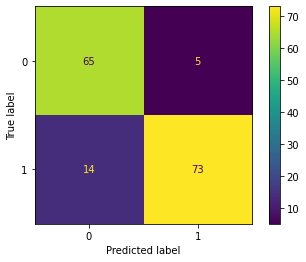

In [115]:
ConfusionMatrixDisplay.from_predictions(final_model,y_test);

# XIII. Export key components
Here is the section to export the important ML objects that will be use to develop an app: Encoder, Scaler, ColumnTransformer, Model, Pipeline, etc.

In [116]:
dump(XGB_hy, "XGB.joblib")

['XGB.joblib']

# XIV. Conclusion and Recommendation